Download data from https://www.kaggle.com/c/titanic-dataset/data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("default")
sns.set()

In [6]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")
gender_baseline = pd.read_csv("gender_baseline.csv")

### Step-1: EDA

In [7]:
train_df.head(3)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0


In [8]:
test_df.head(3)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
2,89,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ"


In [10]:
train_df.shape, test_df.shape

((850, 15), (459, 14))

In [22]:
train_df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

- **sbsp:** # of siblings/spouses
- **parch:** # of parents/children
- **embarked:**  Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton
- **boat:** Lifeboat (if survived)
- **body:** Body number (if did not survive and body was recovered)

In [15]:
train_df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


#### Deal with missing values

In [19]:
# visualize missing data with missingno
import missingno

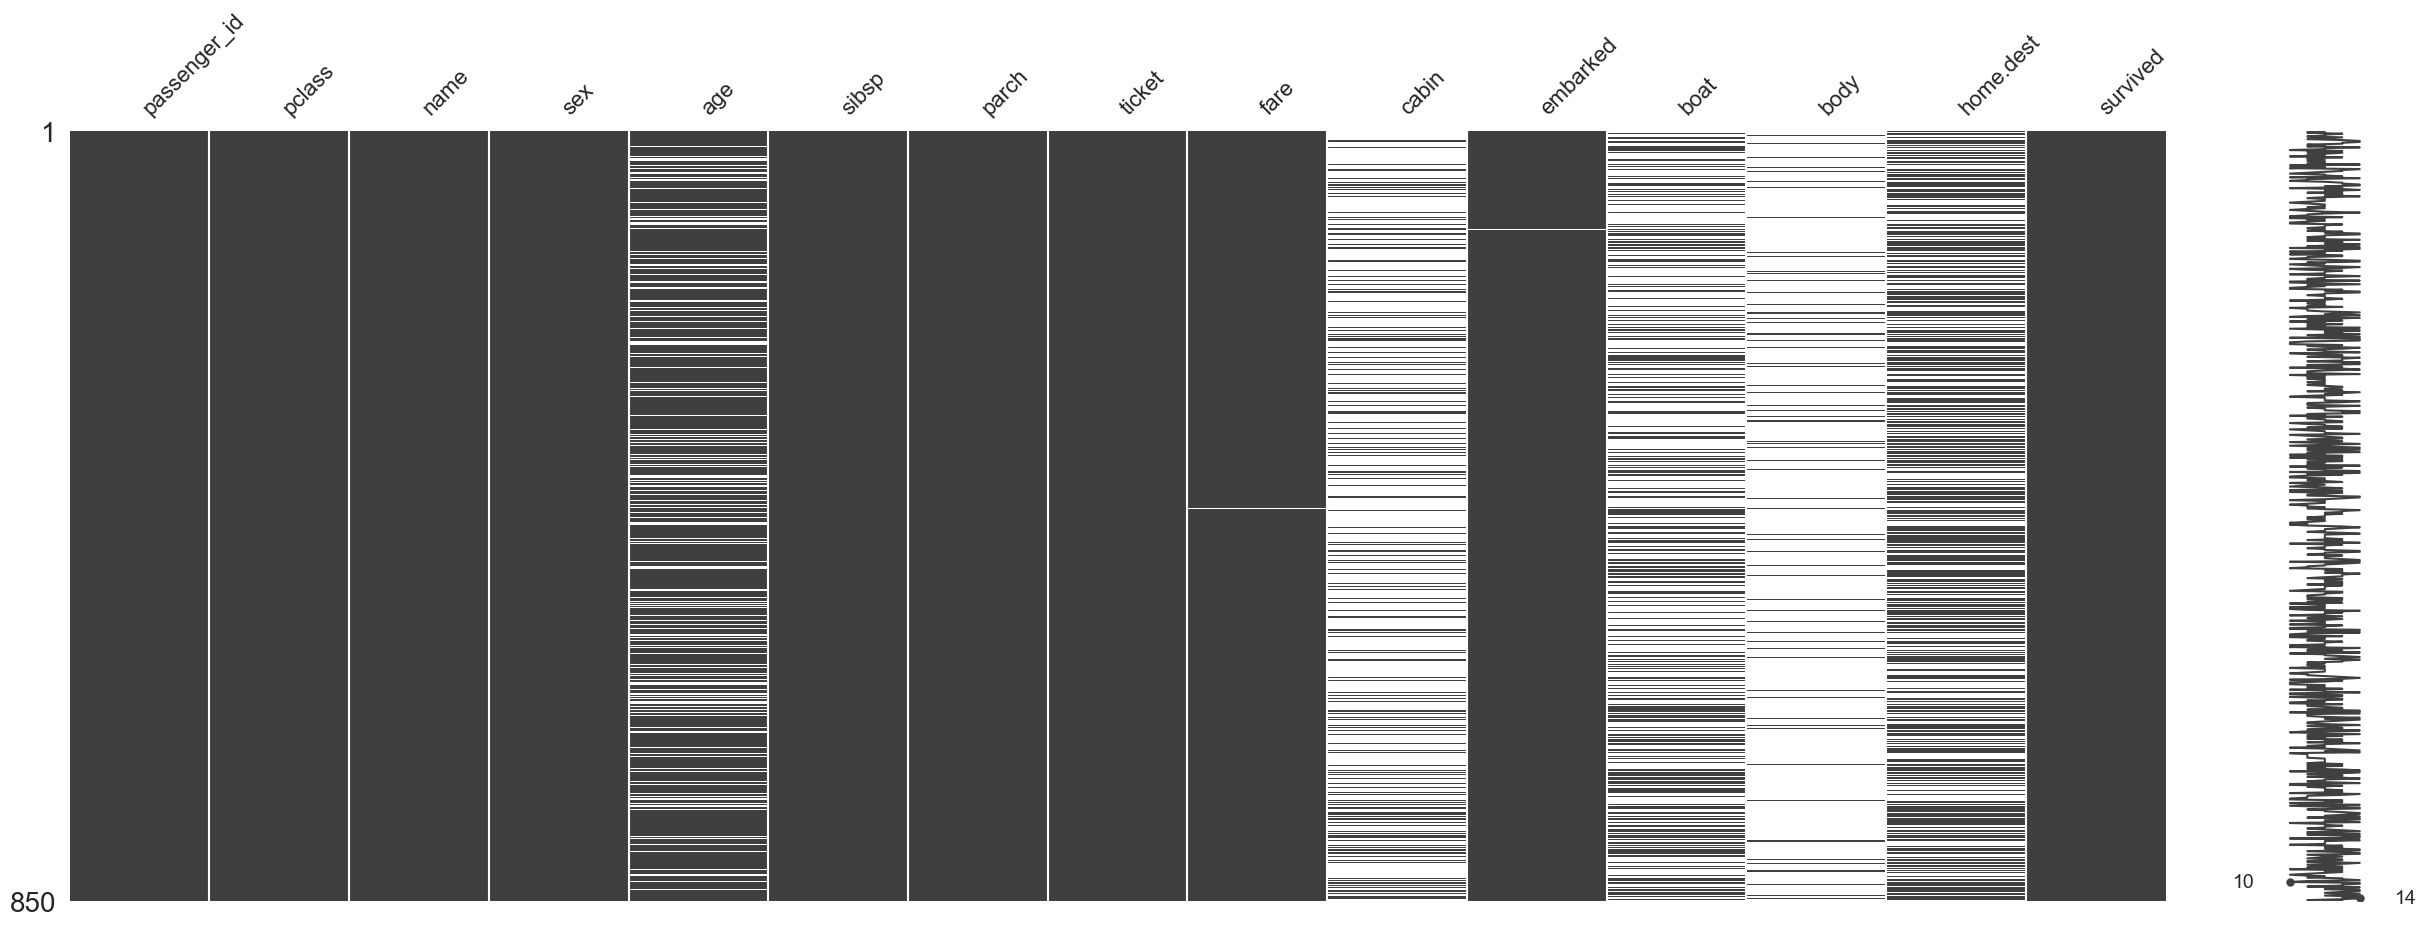

In [21]:
# Plot graphic of missing values
missingno.matrix(train_df, figsize = (30,10));

In [26]:
missing_values = train_df.isnull().sum()
missing_values

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

### To perform data analysis, let's create two empty dataframe where we can add modified data

In [29]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

### Explore each of the features individually

In [24]:
train_df.head(2)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0


#### Target: survived

0    537
1    313
Name: survived, dtype: int64


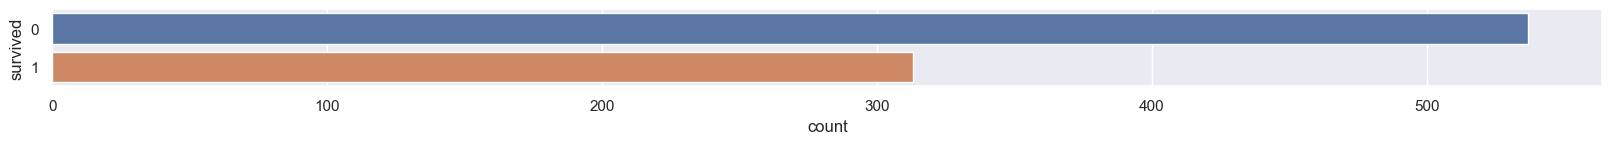

In [25]:
fig = plt.figure(figsize=(20, 1))
sns.countplot(y="survived", data=train_df)
print(train_df.survived.value_counts())

In [30]:
df_bin["survived"] = train_df["survived"]
df_con["survived"] = train_df["survived"]

#### Feature: pclass

In [27]:
missing_values["pclass"]

0

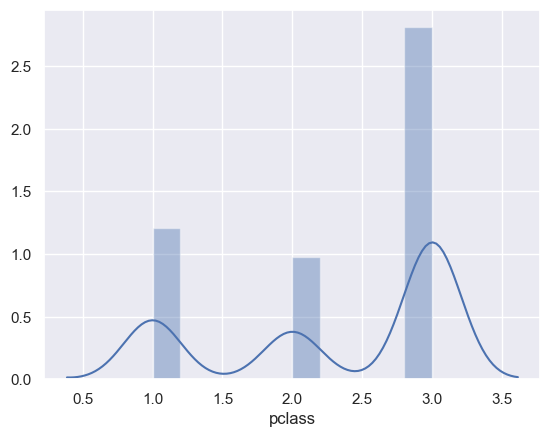

In [28]:
sns.distplot(train_df.pclass);

> Why distplot?

We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

In [31]:
# since there is no missing values, let's add it to the sub-dataframe
df_con["pclass"] = train_df["pclass"]
df_bin["pclass"] = train_df["pclass"]

#### Feature: name

In [36]:
unique_name = train_df.name.unique()
print(len(train_df["name"]), len(unique_name))

850 849


passengerId and name both features can be ignored

#### Feature: sex

male      551
female    299
Name: sex, dtype: int64


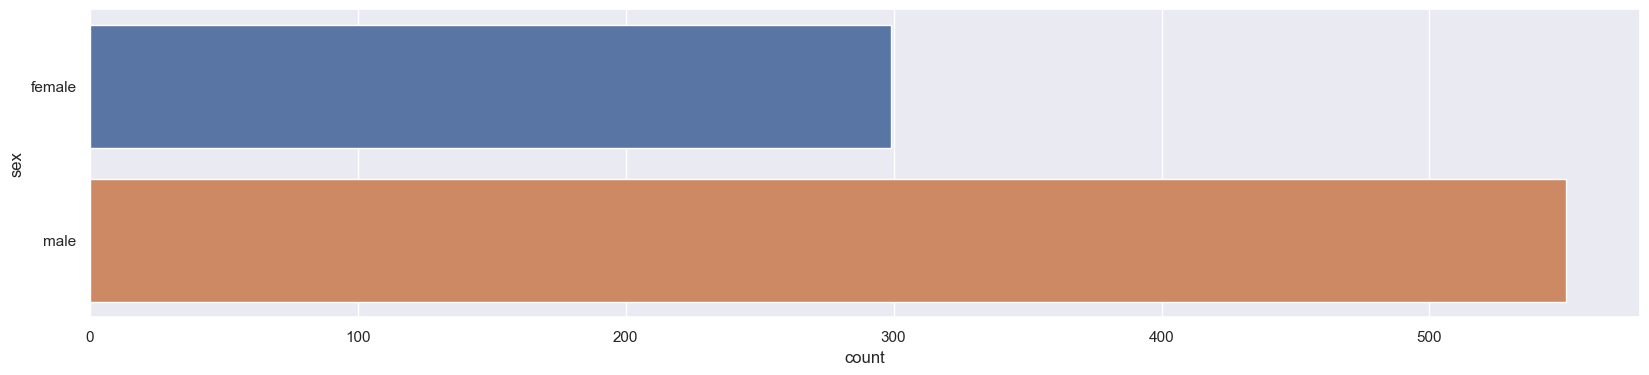

In [46]:
plt.figure(figsize=(20, 4))
sns.countplot(y="sex", data=train_df)
print(train_df.sex.value_counts())

In [47]:
missing_values["sex"]

0

In [48]:
# we'll convert the values of sex feature from string to boolean
df_bin["sex"] = train_df["sex"]
df_bin["sex"] = np.where(df_bin["sex"] == "male", 0, 1)
df_con["sex"] = train_df["sex"]

> How does the Sex variable look compared to Survival?

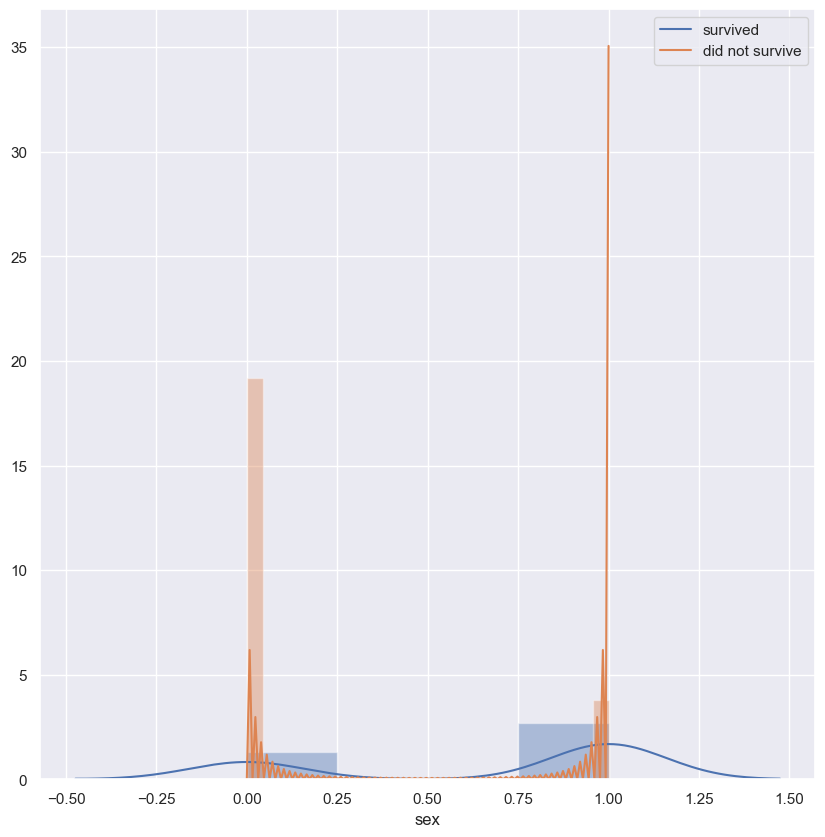

In [59]:
plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin["survived"]==1]["sex"], kde_kws={"label": "survived"})
sns.distplot(df_bin.loc[df_bin["survived"]==0]["sex"], kde_kws={"label": "did not survive"});

We can see that, the survived people are mostly female

#### Feature: age

In [60]:
missing_values["age"]

174

So many missing value, we'll deal with it later

#### Feature: sibsp

In [61]:
missing_values["sibsp"]

0

In [69]:
df_bin["sibsp"] = train_df["sibsp"]
df_con["sibsp"] = train_df["sibsp"]

In [62]:
len(train_df.sibsp.unique())

7

In [68]:
train_df.sibsp.value_counts().sort_index()

0    573
1    213
2     25
3     12
4     14
5      5
8      8
Name: sibsp, dtype: int64

In [74]:
def draw_plot(target_column, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    sns.distplot(df_bin.loc[df_bin["survived"]==1][f"{target_column}"], kde_kws={"label": "survived"})
    sns.distplot(df_bin.loc[df_bin["survived"]==0][f"{target_column}"], kde_kws={"label": "did not survive"});

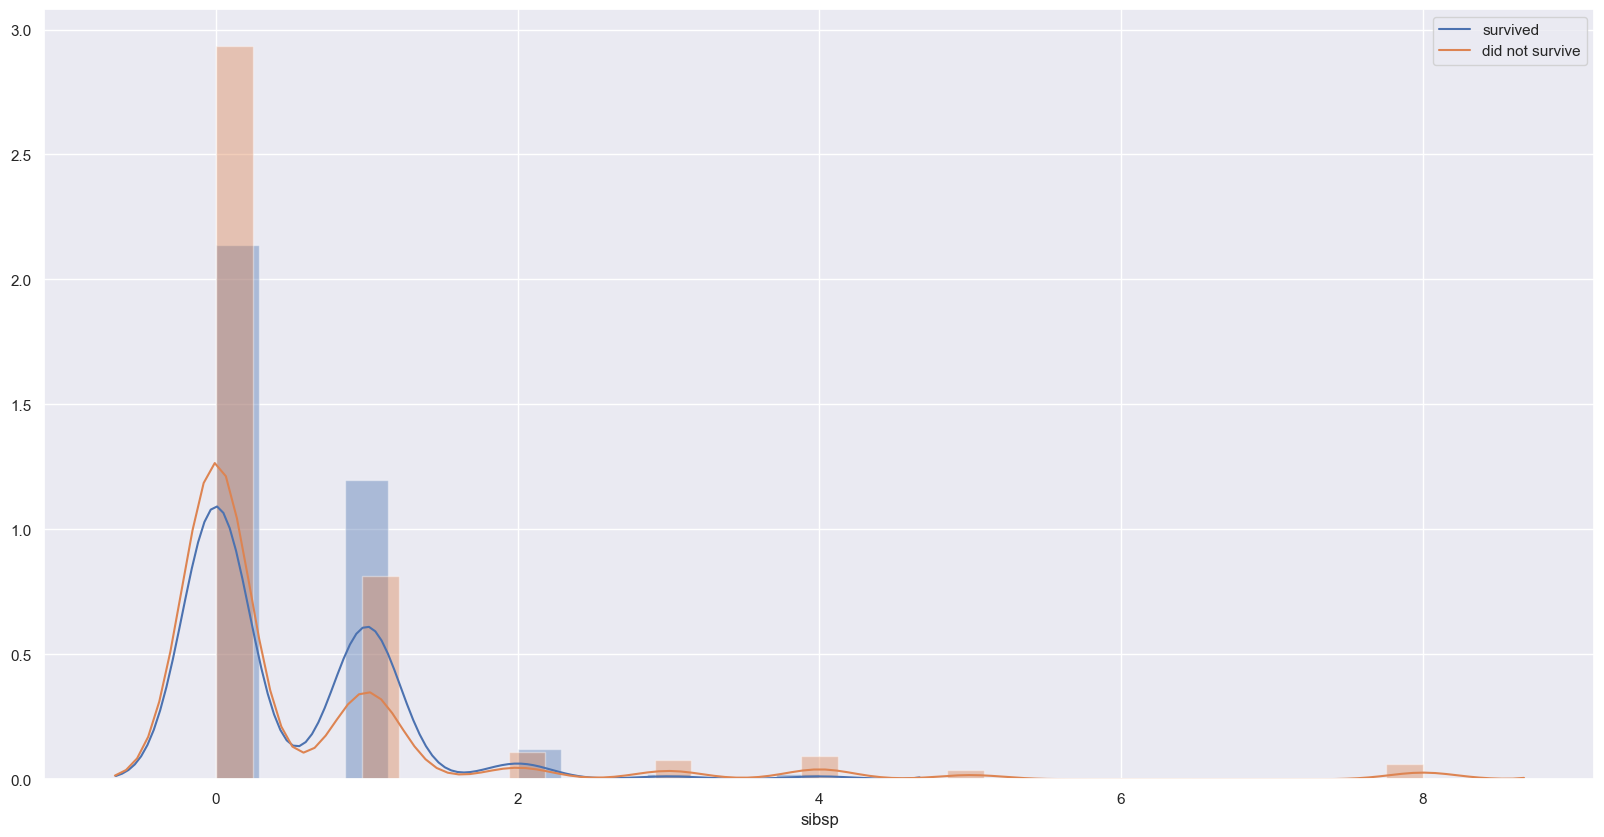

In [75]:
draw_plot(target_column="sibsp", figsize=(20, 10))

> What does the graph tell us?

People having no sibling/spouse have lower survival rate. And people having wife/husband/... have higher survival rate